In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#### Data Import (Preprocessed using R)

In [2]:
encoded_results = pd.read_csv("oh_encoded_w_perc_classification_categorical_data_80.txt" , sep = "\t")

In [3]:
encoded_results.head()

,Number_of_Cells,Number_of_Neighbours,Number_of_PCs,Number_of_HVGs,Algorithm,var_perc,data_ID,Exp_Type,Data_Mean,Data_Var,acceptable_ari
0,2500,1,5,500,3,65.668,Bladder_droplet,1,1.625,0.168,0
1,2500,2,5,500,3,65.668,Bladder_droplet,1,1.625,0.168,0
2,2500,3,5,500,3,65.668,Bladder_droplet,1,1.625,0.168,0
3,2500,4,5,500,3,65.668,Bladder_droplet,1,1.625,0.168,0
4,2500,5,5,500,3,65.668,Bladder_droplet,1,1.625,0.168,0


In [4]:
sets_w_zero = ["Liver_droplet", "Lung_droplet", "Spleen_droplet", "Thymus_droplet", "Tongue_droplet", "Trachea_droplet", "Large_Intestine_spike", "Thymus_spike"]
mask = ~encoded_results["data_ID"].isin(sets_w_zero)

In [5]:
encoded_results = encoded_results[mask]

In [6]:
encoded_results = encoded_results.drop(["data_ID"] , axis = 1)
encoded_results = encoded_results.drop(["Data_Mean"] , axis = 1)
encoded_results = encoded_results.drop(["Data_Var"] , axis = 1)
#encoded_results = encoded_results.drop(["Number_of_HVGs"] , axis = 1)
#encoded_results = encoded_results.drop(["Exp_Type"] , axis = 1)
#encoded_results = encoded_results.drop(["Algorithm"] , axis = 1)
#encoded_results["Var_per_PC"] = encoded_results["var_perc"] / encoded_results["Number_of_PCs"]
labels = encoded_results["acceptable_ari"]
features = encoded_results.drop(["acceptable_ari"] , axis = 1)

In [7]:
encoded_results.isna().sum()

Number_of_Cells         0
Number_of_Neighbours    0
Number_of_PCs           0
Number_of_HVGs          0
Algorithm               0
var_perc                0
Exp_Type                0
acceptable_ari          0
dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, labels ,test_size=.25,random_state = 25)

In [9]:
X_train

,Number_of_Cells,Number_of_Neighbours,Number_of_PCs,Number_of_HVGs,Algorithm,var_perc,Exp_Type
76576,1564,19,47,500,1,31.370,2
51509,4865,2,4,2000,3,43.452,2
77308,1564,40,47,1500,2,40.954,2
81004,1697,29,4,2500,2,9.969,2
8495,3909,1,4,1500,3,45.694,1
...,...,...,...,...,...,...,...
78214,2310,17,47,2000,3,30.952,2
50143,3401,25,6,3000,3,50.793,2
51902,4865,3,4,1000,2,36.393,2
6618,2781,15,4,500,1,42.013,1


In [10]:
X_test

,Number_of_Cells,Number_of_Neighbours,Number_of_PCs,Number_of_HVGs,Algorithm,var_perc,Exp_Type
105454,6498,48,7,1500,2,29.224,1
80928,1697,15,6,1500,3,18.172,2
52551,4865,36,5,1000,2,38.061,2
62714,1960,16,5,2000,2,22.517,2
65253,714,15,6,1500,2,69.045,2
...,...,...,...,...,...,...,...
90651,1350,49,10,3000,3,41.992,2
48471,3401,10,5,2500,2,36.805,2
93934,5384,24,6,500,3,57.947,2
95027,5384,24,4,3000,1,27.326,2


In [11]:
X_train.to_csv("train_data.txt" , sep = "\t" , index = False)
X_test.to_csv("test_data.txt" , sep = "\t" , index = False)
y_train.to_csv("train_data_labels.txt" , sep = "\t" , index = False)
y_test.to_csv("test_data_labels.txt" , sep = "\t" , index = False)

In [11]:
y_train.sum()

13256

In [12]:
y_test.sum()

4386

In [13]:
features

,Number_of_Cells,Number_of_Neighbours,Number_of_PCs,Number_of_HVGs,Algorithm,var_perc,Exp_Type
0,2500,1,5,500,3,65.668,1
1,2500,2,5,500,3,65.668,1
2,2500,3,5,500,3,65.668,1
3,2500,4,5,500,3,65.668,1
4,2500,5,5,500,3,65.668,1
...,...,...,...,...,...,...,...
109945,3994,46,6,3000,1,20.285,1
109946,3994,47,6,3000,1,20.285,1
109947,3994,48,6,3000,1,20.285,1
109948,3994,49,6,3000,1,20.285,1


#### RandomForest Algorithm

In [16]:
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import pipeline
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

def training_pipeline(pipeline, X, y, param_grid, searching_strategy = "grid_search", 
                          scoring = "roc_auc", verbose = 10, cv = 10, n_jobs = 10):
        if searching_strategy == "grid_search":
            model = model_selection.GridSearchCV(
                estimator = pipeline,
                param_grid = param_grid,
                scoring = scoring,
                verbose = verbose,
                n_jobs = n_jobs,
                cv = cv
            )
        model.fit(X,y)
        return model
    
classifier = (Pipeline([
                        ("classifier", ensemble.RandomForestClassifier(n_jobs = 10))]))

# burada TPR'ı ve TNR'ı belirli bir threshold'un üzeirnde olacak şekilde
# cost'u maximize ediyorum.
from sklearn.metrics import roc_auc_score
def my_custom_loss_func(y_true, y_pred):
    from sklearn.metrics import roc_auc_score, recall_score, precision_score
    tpr = recall_score(y_true, y_pred)
    tnr = recall_score((~y_true.astype(bool)).astype(int), (~y_pred.astype(bool)).astype(int))
    
    if tpr > 0.90 and tnr > 0.80:
        return roc_auc_score(y_true, y_pred)
    
    return 0

from sklearn.metrics import make_scorer
myscorer = make_scorer(my_custom_loss_func, greater_is_better = True)

param_grid = {
    "classifier__n_estimators" : [16],
    "classifier__max_depth": [16],
    "classifier__criterion": ["gini"],
    "classifier__min_samples_split": [8],
    "classifier__max_features": [4],
    "classifier__class_weight":  [{0: 1, 1: 1.9}]
}


best_model_rf = training_pipeline(pipeline = classifier, X = X_train, y = y_train, param_grid = param_grid, scoring = "roc_auc", verbose = 10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [17]:
best_model_rf.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 1.9},
                                        max_depth=16, max_features=4,
                                        min_samples_split=8, n_estimators=16,
                                        n_jobs=10))])

In [18]:
best_model_rf.best_params_

{'classifier__class_weight': {0: 1, 1: 1.9},
 'classifier__criterion': 'gini',
 'classifier__max_depth': 16,
 'classifier__max_features': 4,
 'classifier__min_samples_split': 8,
 'classifier__n_estimators': 16}

In [19]:
best_model_rf.best_score_

0.9937986087244782

In [20]:
def print_confision_stats(confusion_matrix):
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.values.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    
    print("TPR", TPR[1])
    print("TNR", TNR[1])
    print("PPV", PPV[1])
    print("NPV", NPV[1])
    print("FPR", FPR[1])
    print("FDR", FDR[1])

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("ACC", ACC[1])

def print_cross_val_result(estimator, X_train, y_train, X_test, y_test, cv_split):
    from sklearn.model_selection import cross_val_predict
    y_pred = cross_val_predict(estimator, X_train, y_train, cv= cv_split)
    print("Confusion Matrix For Train")
    conf_mat_train = metrics.confusion_matrix(y_train, y_pred)
    print(conf_mat_train)
    print_confision_stats(pd.DataFrame(conf_mat_train))
    print("Roc-Auc Score For Train")
    print(metrics.roc_auc_score(y_train, estimator.predict_proba(X_train)[:,1]))
    print("MCC For Train")
    print(metrics.matthews_corrcoef(y_train, y_pred))
    
    print_test_score(estimator, X_test, y_test)

def print_test_score(estimator, X_test, y_test):
    print("\n")
    #Test set için predictionların alınması
    y_pred_test = estimator.predict(X_test)
    print("Confusion Matrix For Test")
    conf_mat_test = metrics.confusion_matrix(y_test, y_pred_test)
    print(conf_mat_test)
    print_confision_stats(pd.DataFrame(conf_mat_test))

    print("Roc-Auc Score For Test")
    print(metrics.roc_auc_score(y_test, estimator.predict_proba(X_test)[:,1]))
    print("MCC For Test")
    print(metrics.matthews_corrcoef(y_test, y_pred_test))  

In [21]:
print_cross_val_result(best_model_rf.best_estimator_, X_train, y_train, X_test, y_test, 10)

Confusion Matrix For Train
[[51791  1215]
 [  808 12448]]
TPR 0.9390464695232348
TNR 0.977078066633966
PPV 0.9110737027007246
NPV 0.984638491226069
FPR 0.022921933366034035
FDR 0.08892629729927541
ACC 0.9694696809634481
Roc-Auc Score For Train
0.998495631243486
MCC For Train
0.9058608713216022


Confusion Matrix For Test
[[17297   405]
 [  250  4136]]
TPR 0.9430004559963521
TNR 0.977121229239634
PPV 0.9108125963444176
NPV 0.9857525502934975
FPR 0.02287877076036606
FDR 0.08918740365558248
ACC 0.9703458891705904
Roc-Auc Score For Test
0.9946168564195719
MCC For Test
0.9082670497427106


In [22]:
from sklearn.base import clone

def recursive_feature_elimination(estimator, X_train, y_train, cv =10, tol = 0.0005):
    features = pd.Series(estimator.feature_importances_)
    features.index = X_train.columns
    return features.sort_values(ascending = False)

from matplotlib import pyplot as plt 
sorted_importance = recursive_feature_elimination(best_model_rf.best_estimator_[0], X_train, y_train)
import re
sorted_importance_features = list(sorted_importance.index.values)
sorted_importance.plot.bar(figsize = (20,6))
plt.tight_layout()
plt.axhline(y=np.median(sorted_importance.values), color='r', linestyle='-')
plt.xlabel('Features', labelpad=20)
plt.ylabel('Importance')
plt.savefig('importance.pdf')

In [14]:
rf_tuned = RandomForestClassifier(class_weight={0: 1, 1: 1.9},
                                        max_depth=16, max_features=4,
                                        min_samples_split=8, n_estimators=16).fit(X_train , y_train)

In [20]:
number_of_cells = 902
number_of_pc = 8
extype = 1
number_of_hvgs = 1000
var_perc = 64

df = pd.DataFrame()
df["Number_of_Cells"] = [int(number_of_cells)] * 150
df["Number_of_Neighbours"] = list(range(1, 51)) * 3
df['Number_of_PCs'] = [int(number_of_pc)] * 150
df["Number_of_HVGs"] = [int(number_of_hvgs)] * 150
df["Algorithm"] = ['Walktrap'] * 50 + ['Leiden'] * 50 + ['Louvain'] * 50
df['Algorithm'] = df['Algorithm'].replace({'Leiden': 1, 'Louvain': 2, 'Walktrap': 3})
df["var_perc"] = [float(var_perc)] * 150
df["Exp_Type"] = [int(extype)] * 150

In [23]:
rf_tuned.predict_proba(df)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.98496835, 0.01503165],
       [1.        , 0.        ],
       [0.94054184, 0.05945816],
       [0.99002101, 0.00997899],
       [0.99002101, 0.00997899],
       [0.69375477, 0.30624523],
       [0.67752101, 0.32247899],
       [0.67752101, 0.32247899],
       [0.67752101, 0.32247899],
       [0.71578631, 0.28421369],
       [0.71578631, 0.28421369],
       [0.71578631, 0.28421369],
       [0.71578631, 0.28421369],
       [0.71578631, 0.28421369],
       [0.67752101, 0.32247899],
       [0.67752101, 0.32247899],
       [0.67752101, 0.32247899],
       [0.67752101, 0.32247899],
       [0.67752101, 0.32247899],
       [0.6875    , 0.3125    ],
       [0.6875    , 0.3125    ],
       [0.

In [24]:
y_pred = rf_tuned.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.9688518652662079

In [26]:
confusion_matrix(y_test, y_pred)

array([[17277,   425],
       [  263,  4123]])

In [32]:
import seaborn as sns

feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title("Feature Importances")
plt.tight_layout()
plt.savefig('feature_importances.pdf')

In [28]:
rf_tuned.predict_proba(X_test)[:,1]

array([0.9982935 , 0.        , 0.        , ..., 0.20104072, 0.        ,
       0.        ])

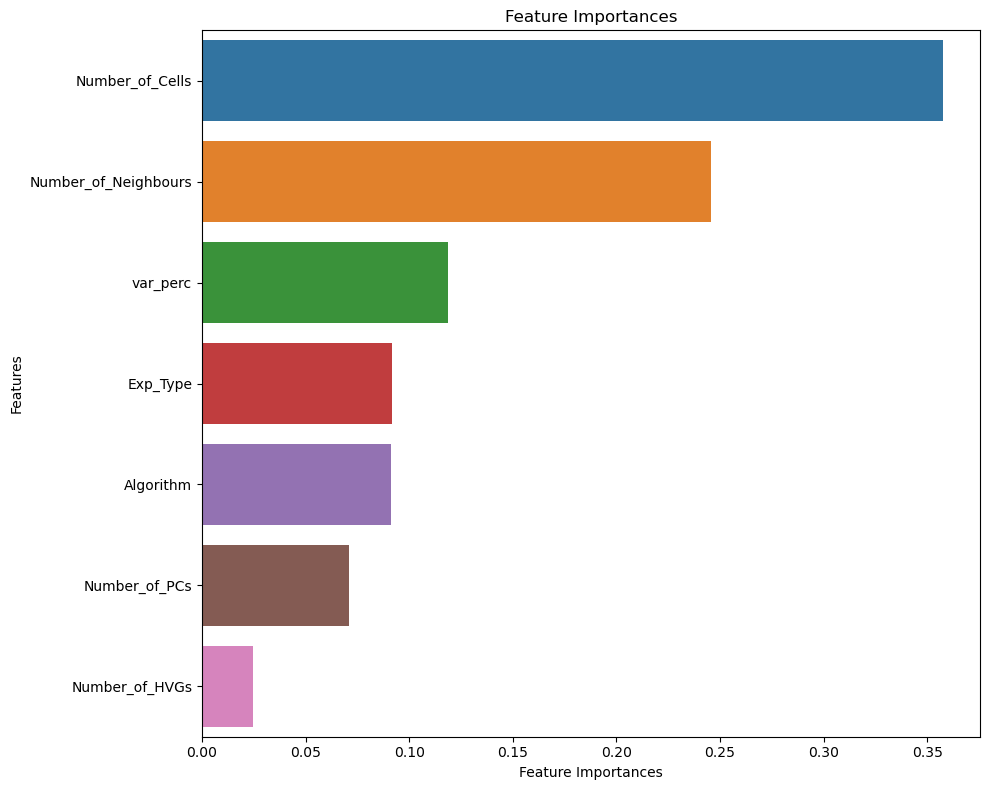

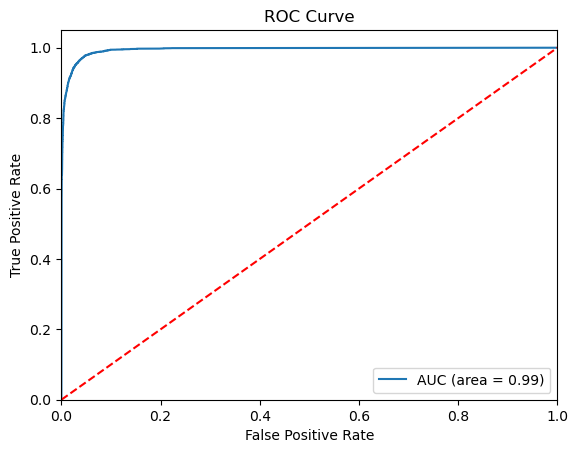

In [33]:
logit_roc_auc = roc_auc_score(y_test, rf_tuned.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('ROC.pdf')
plt.show()

In [31]:
import pickle

filename = 'SUMA.sav'
pickle.dump(rf_tuned, open(filename, 'wb'))